<a href="https://colab.research.google.com/github/StellaNyam/Semantic-Analysis/blob/main/Mobile__Money_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully!
First 5 rows of the dataset:
Dataset shape: (210, 6)

Column names:
['Year', 'Month', 'Active Agents', 'Total Registered Mobile Money Accounts (Millions)', 'Total Agent Cash in Cash Out (Volume Million)', 'Total Agent Cash in Cash Out (Value KSh billions)']
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               210 non-null    int64  
 1   Month                                              210 non-null    object 
 2   Active Agents                                      210 non-null    int64  
 3   Total Registered Mobile Money Accounts (Millions)  210 non-null    float64
 4   Total Agent Cash in Cash Out (Volume Million)      210 non-null    float64
 5   Total Agent Cash in Cash Out (Val

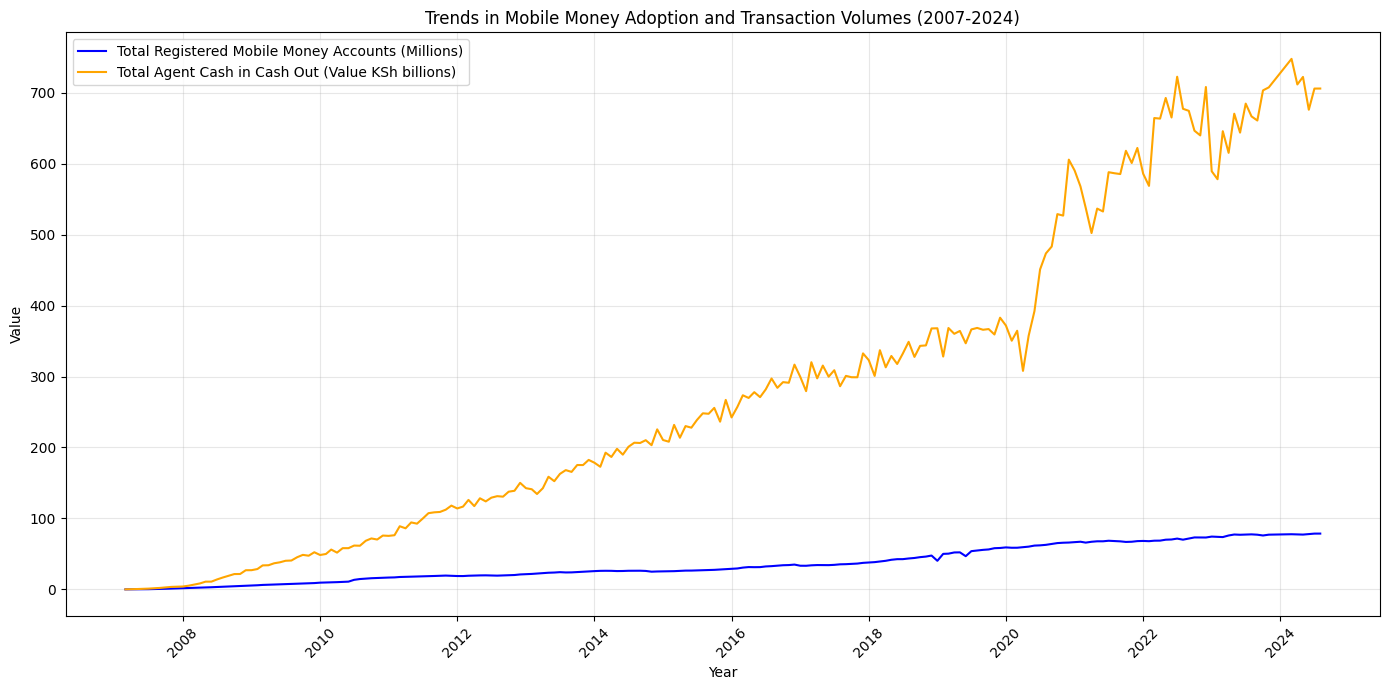

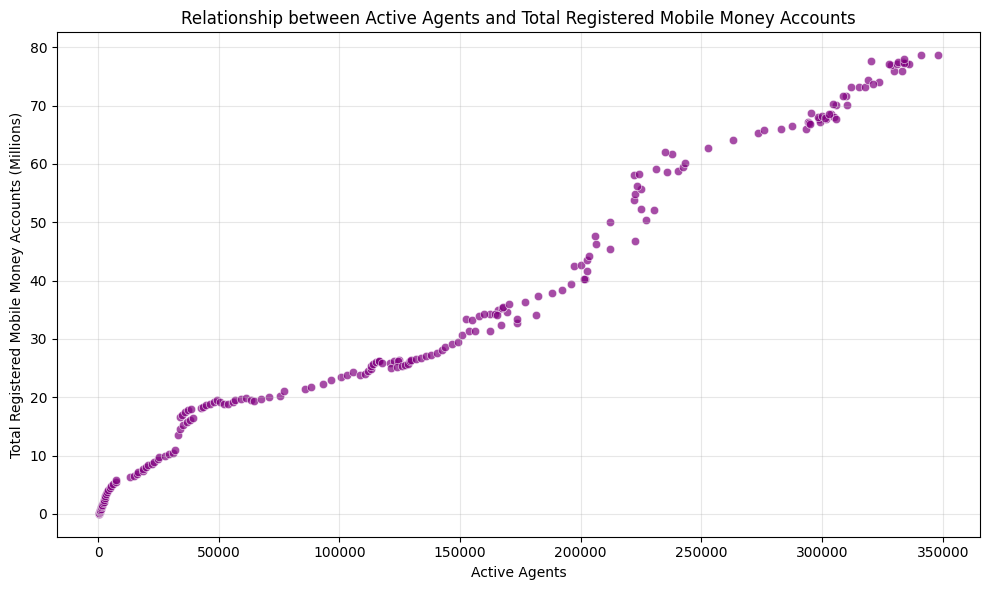

Correlation coefficient: 0.9882


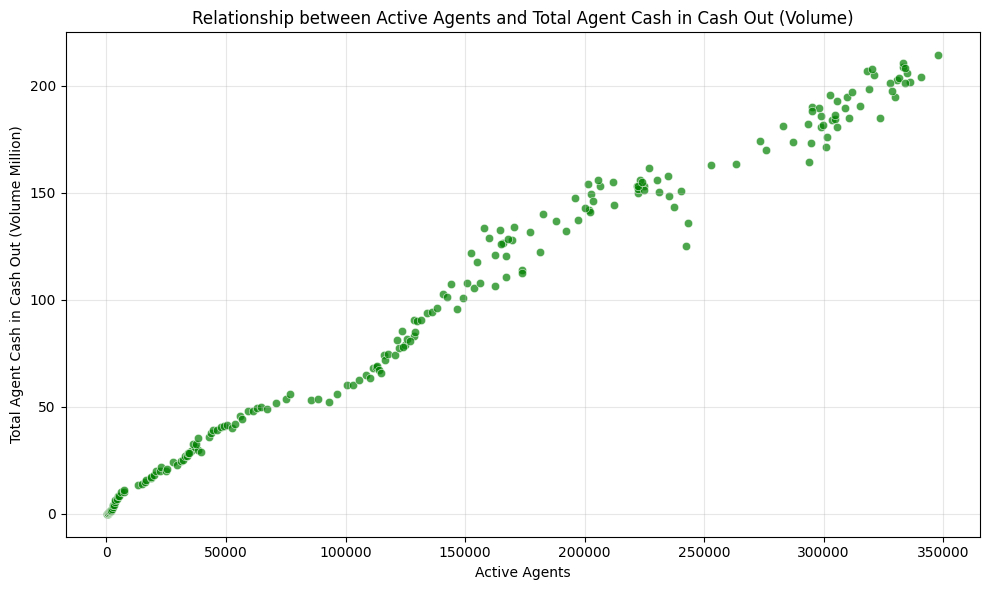

Correlation coefficient: 0.9901
Training set shape: (165, 3)
Test set shape: (42, 3)
Random Forest Model Performance:
MSE: 2.7166
R² Score: 0.9950


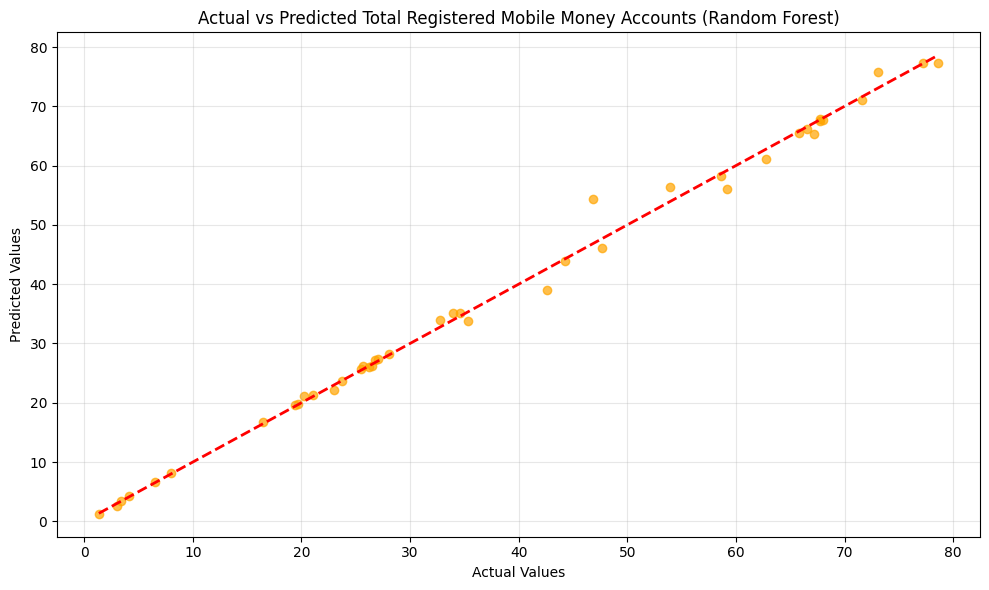

Training data points: 165
Test data points: 42
Searching for optimal SARIMA parameters...
Best SARIMA parameters: (2, 1, 2)x(1, 1, 1, 12)
Best AIC: 499.89
Model Summary:
                                               SARIMAX Results                                               
Dep. Variable:     Total Registered Mobile Money Accounts (Millions)   No. Observations:                  165
Model:                                ARIMA(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -242.947
Date:                                               Tue, 27 May 2025   AIC                            499.895
Time:                                                       08:04:06   BIC                            521.062
Sample:                                                   03-01-2007   HQIC                           508.494
                                                        - 11-01-2020                                         
Covariance Type:                                            

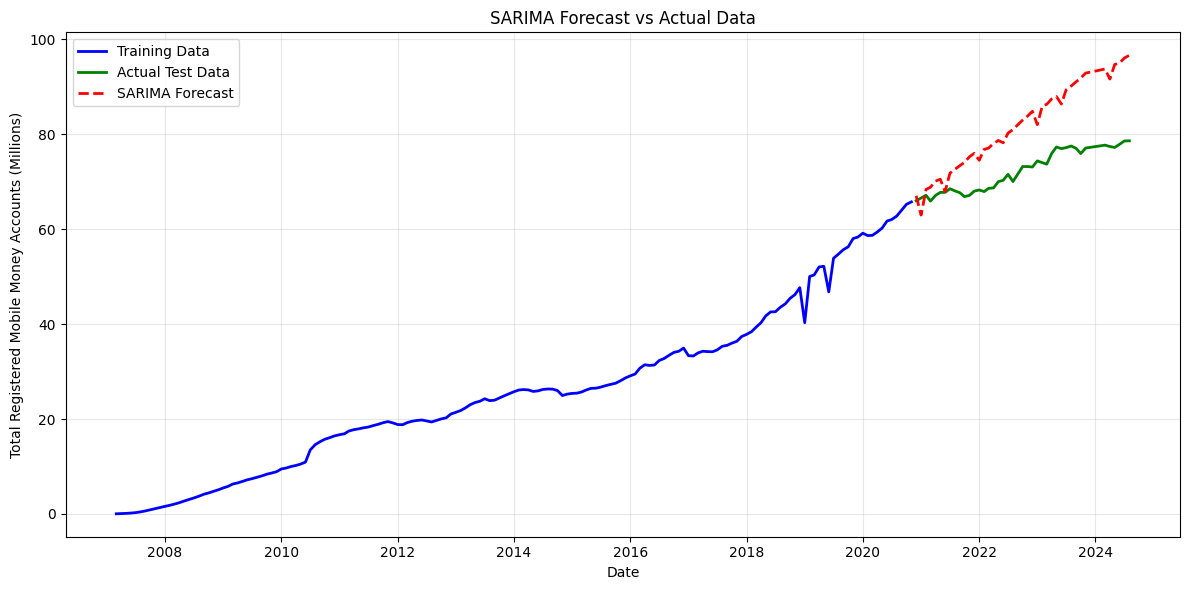

2025 Mobile Money Accounts Forecast:
                 Date  Forecasted Accounts (Millions)
2020-12-01 2024-09-30                       67.045043
2021-01-01 2024-10-31                       62.988443
2021-02-01 2024-11-30                       68.391298
2021-03-01 2024-12-31                       68.859230
2021-04-01 2025-01-31                       70.134295
2021-05-01 2025-02-28                       70.548282
2021-06-01 2025-03-31                       67.947390
2021-07-01 2025-04-30                       71.816141
2021-08-01 2025-05-31                       72.637659
2021-09-01 2025-06-30                       73.399366
2021-10-01 2025-07-31                       74.102598
2021-11-01 2025-08-31                       75.296548


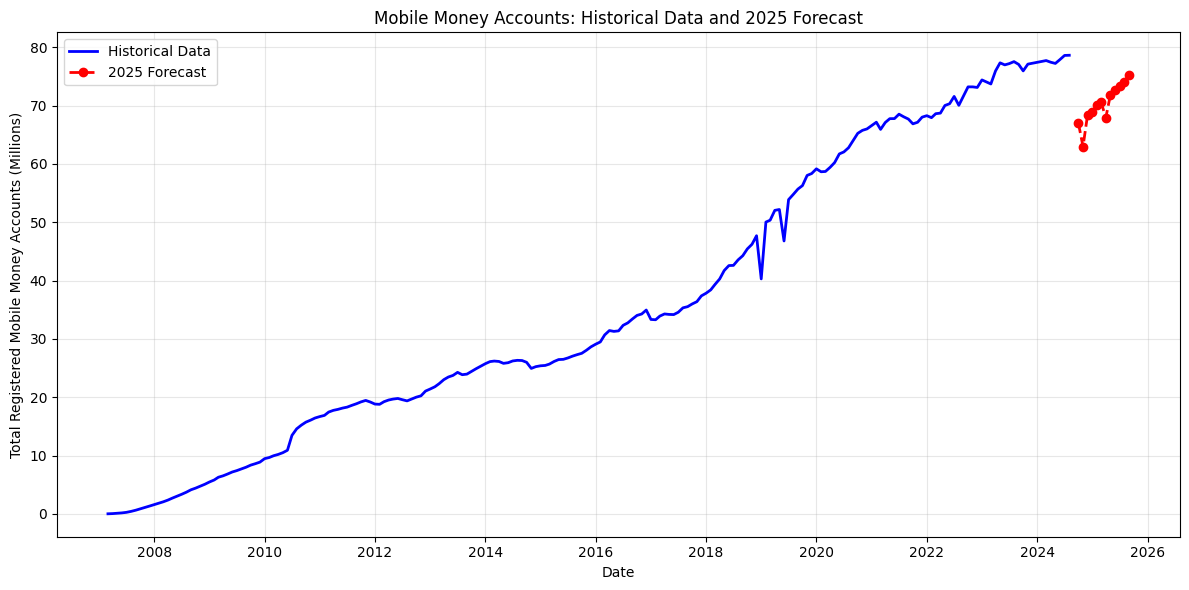

Finding optimal parameters for Volume forecast...
Finding optimal parameters for Value forecast...
Volume SARIMA: (0, 1, 1)x(0, 1, 1, 12)
Value SARIMA: (2, 1, 2)x(0, 1, 1, 12)
Complete 2025 Mobile Money Forecast:
                 Date  Forecasted Accounts (Millions)  \
2024-09-30 2024-09-30                       67.045043   
2024-10-31 2024-10-31                       62.988443   
2024-11-30 2024-11-30                       68.391298   
2024-12-31 2024-12-31                       68.859230   
2025-01-31 2025-01-31                       70.134295   
2025-02-28 2025-02-28                       70.548282   
2025-03-31 2025-03-31                       67.947390   
2025-04-30 2025-04-30                       71.816141   
2025-05-31 2025-05-31                       72.637659   
2025-06-30 2025-06-30                       73.399366   
2025-07-31 2025-07-31                       74.102598   
2025-08-31 2025-08-31                       75.296548   

            Forecasted Volume (Million)  Fore

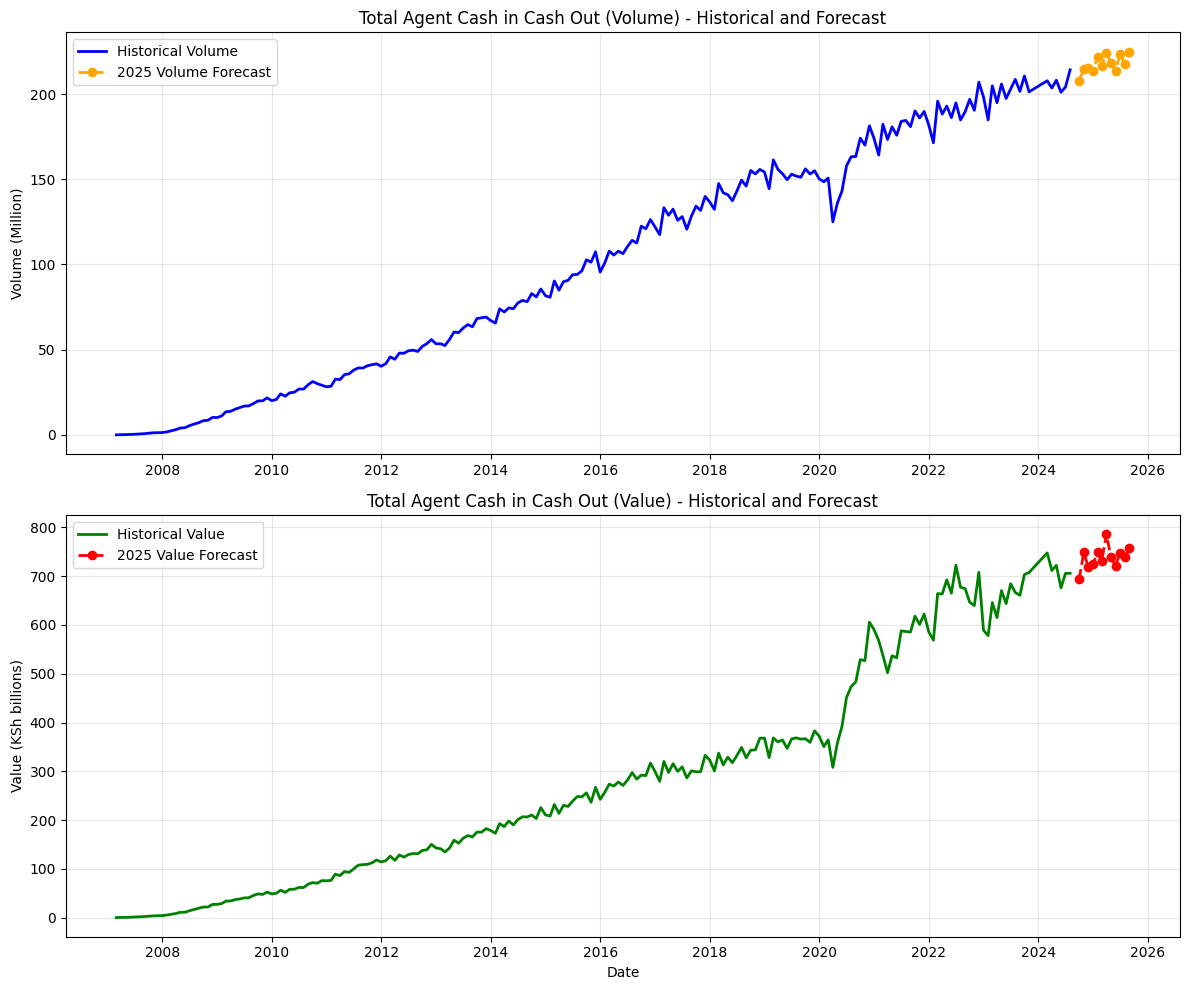

Models saved successfully!
Files created:
- sarima_registered_accounts.pkl
- sarima_volume.pkl
- sarima_value.pkl
MOBILE PAYMENTS DATA ANALYSIS SUMMARY
Dataset Period: 2007-03 to 2024-08
Total Data Points: 207

KEY FINDINGS:
• Correlation (Active Agents vs Registered Accounts): 0.9882
• Correlation (Active Agents vs Volume): 0.9901

MODEL PERFORMANCE:
• Random Forest R² Score: 0.9950
• SARIMA Model MAE: 9.48
• SARIMA Model RMSE: 10.63

2025 FORECAST HIGHLIGHTS:
• Expected Registered Accounts by Dec 2025: 75.30 Million
• Expected Transaction Volume by Dec 2025: 224.98 Million
• Expected Transaction Value by Dec 2025: 757.15 KSh Billion


In [4]:
# Mobile Payments Data Analysis - Jupyter Notebook

## 1. Data Collection and Loading


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Mobile Payments dataset
df = pd.read_csv("/content/sample_data/Mobile Payments.csv")
print("Data loaded successfully!")

## 2. Data Exploration

# Display the head (The first five rows) of the dataframe to understand its structure
print("First 5 rows of the dataset:")
df.head()

# Check dataset shape and column information
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())

# Check data types and missing values
print("Dataset Info:")
df.info()

# Get summary statistics on your dataset
print("Summary Statistics:")
df.describe()

## 3. Data Cleaning and Preprocessing

# Checking for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")


# Converting Year and Month to a Datetime Index
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'])
df = df.set_index('Date').sort_index()
print("Date column created and set as index")
print(f"Date range: {df.index.min()} to {df.index.max()}")


# Outlier Detection and Removal using IQR Method
numeric_cols = ['Active Agents', 'Total Registered Mobile Money Accounts (Millions)',
                'Total Agent Cash in Cash Out (Volume Million)',
                'Total Agent Cash in Cash Out (Value KSh billions)']

print("Original dataset shape:", df.shape)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Dataset shape after outlier removal:", df.shape)
## 4. Exploratory Data Analysis (EDA)

# Plotting trends in Mobile Money Adoption and Transaction Volumes
plt.figure(figsize=(14, 7))

# Plot Total Registered Mobile Money Accounts
sns.lineplot(data=df, x=df.index, y='Total Registered Mobile Money Accounts (Millions)',
             label='Total Registered Mobile Money Accounts (Millions)', color='blue')

# Plot Total Agent Cash in Cash Out (Value)
sns.lineplot(data=df, x=df.index, y='Total Agent Cash in Cash Out (Value KSh billions)',
             label='Total Agent Cash in Cash Out (Value KSh billions)', color='orange')

plt.title('Trends in Mobile Money Adoption and Transaction Volumes (2007-2024)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation analysis between Active Agents and Total Registered Mobile Money Accounts
correlation = df['Active Agents'].corr(df['Total Registered Mobile Money Accounts (Millions)'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Active Agents', y='Total Registered Mobile Money Accounts (Millions)',
                color='purple', alpha=0.7)

plt.title('Relationship between Active Agents and Total Registered Mobile Money Accounts')
plt.xlabel('Active Agents')
plt.ylabel('Total Registered Mobile Money Accounts (Millions)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation coefficient: {correlation:.4f}")

# Correlation analysis between Volume and Active Agents
correlation_volume_agents = df['Total Agent Cash in Cash Out (Volume Million)'].corr(df['Active Agents'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Active Agents', y='Total Agent Cash in Cash Out (Volume Million)',
                color='green', alpha=0.7)

plt.title('Relationship between Active Agents and Total Agent Cash in Cash Out (Volume)')
plt.xlabel('Active Agents')
plt.ylabel('Total Agent Cash in Cash Out (Volume Million)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation coefficient: {correlation_volume_agents:.4f}")

## 5. Machine Learning Model - Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting relevant features for modeling
features = df[['Active Agents', 'Total Agent Cash in Cash Out (Volume Million)',
               'Total Agent Cash in Cash Out (Value KSh billions)']]
target = df['Total Registered Mobile Money Accounts (Millions)']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate performance metrics
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest Model Performance:")
print(f"MSE: {rf_mse:.4f}")
print(f"R² Score: {rf_r2:.4f}")


# Plotting actual vs predicted values for Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, color='orange', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title('Actual vs Predicted Total Registered Mobile Money Accounts (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Time Series Analysis - SARIMA Model

import itertools
from statsmodels.tsa.arima.model import ARIMA

# Prepare time series data
target_series = df['Total Registered Mobile Money Accounts (Millions)']
split_idx = int(len(target_series) * 0.8)
train_data, test_data = target_series.iloc[:split_idx], target_series.iloc[split_idx:]

print(f"Training data points: {len(train_data)}")
print(f"Test data points: {len(test_data)}")


# Grid Search for optimal SARIMA parameters
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

P_values = range(0, 2)  # Seasonal AR
D_values = range(0, 2)  # Seasonal differencing
Q_values = range(0, 2)  # Seasonal MA
s_values = [12]         # Seasonal period (12 months)

best_score, best_params, best_seasonal_params = float("inf"), None, None

print("Searching for optimal SARIMA parameters...")

for p, d, q in itertools.product(p_values, d_values, q_values):
    for P, D, Q, s in itertools.product(P_values, D_values, Q_values, s_values):
        try:
            model = ARIMA(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_score:
                best_score = aic
                best_params = (p, d, q)
                best_seasonal_params = (P, D, Q, s)
        except:
            continue

print(f"Best SARIMA parameters: {best_params}x{best_seasonal_params}")
print(f"Best AIC: {best_score:.2f}")

# Train final SARIMA model with optimal parameters
final_model = ARIMA(train_data, order=best_params, seasonal_order=best_seasonal_params)
final_model_fit = final_model.fit()

print("Model Summary:")
print(final_model_fit.summary())


# Generate forecasts for test period
forecast_steps = len(test_data)
forecast = final_model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))
aic = final_model_fit.aic

print(f"SARIMA Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"AIC: {aic:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(train_data, color='blue', label='Training Data', linewidth=2)
# Use the actual index of test_data for both actual and forecast plotting
plt.plot(test_data.index, test_data, color='green', label='Actual Test Data', linewidth=2)
plt.plot(test_data.index, forecast, color='red', linestyle='--',
         label='SARIMA Forecast', linewidth=2)

plt.title('SARIMA Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Total Registered Mobile Money Accounts (Millions)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 7. Future Forecasting (2025 Predictions)


# Generate future forecasts for 12 months ahead
future_steps = 12
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1),
                           periods=future_steps, freq='M')
future_forecast = final_model_fit.forecast(steps=future_steps)

# Create forecast dataframe
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Accounts (Millions)': future_forecast
})

print("2025 Mobile Money Accounts Forecast:")
print(forecast_df)

# Visualize future forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, target_series, color='blue', label='Historical Data', linewidth=2)
plt.plot(future_dates, future_forecast, color='red', linestyle='--',
         label='2025 Forecast', linewidth=2, marker='o')

plt.title('Mobile Money Accounts: Historical Data and 2025 Forecast')
plt.xlabel('Date')
plt.ylabel('Total Registered Mobile Money Accounts (Millions)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 8. Additional Forecasts for Volume and Value


# Forecast for Volume and Value metrics
volume_series = df['Total Agent Cash in Cash Out (Volume Million)']
value_series = df['Total Agent Cash in Cash Out (Value KSh billions)']

def find_best_sarima(series):
    """Find optimal SARIMA parameters for a given series"""
    best_score, best_params, best_seasonal = float("inf"), None, None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        for P, D, Q, s in itertools.product(P_values, D_values, Q_values, s_values):
            try:
                model = ARIMA(series, order=(p, d, q), seasonal_order=(P, D, Q, s))
                model_fit = model.fit()
                if model_fit.aic < best_score:
                    best_score = model_fit.aic
                    best_params = (p, d, q)
                    best_seasonal = (P, D, Q, s)
            except:
                continue
    return best_params, best_seasonal

# Find optimal parameters for Volume and Value
print("Finding optimal parameters for Volume forecast...")
best_params_volume, best_seasonal_volume = find_best_sarima(volume_series)

print("Finding optimal parameters for Value forecast...")
best_params_value, best_seasonal_value = find_best_sarima(value_series)

print(f"Volume SARIMA: {best_params_volume}x{best_seasonal_volume}")
print(f"Value SARIMA: {best_params_value}x{best_seasonal_value}")

# Train final models and generate forecasts
final_model_volume = ARIMA(volume_series, order=best_params_volume,
                          seasonal_order=best_seasonal_volume).fit()
final_model_value = ARIMA(value_series, order=best_params_value,
                         seasonal_order=best_seasonal_value).fit()

# Generate 2025 forecasts
forecast_volume = final_model_volume.forecast(steps=future_steps)
forecast_value = final_model_value.forecast(steps=future_steps)

# Assign the future_dates index to the forecast series
# This ensures that the index of the forecast series matches the future_dates
future_forecast.index = future_dates
forecast_volume.index = future_dates
forecast_value.index = future_dates

# Combined forecast dataframe - Now the indices should align
combined_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Accounts (Millions)': future_forecast,
    'Forecasted Volume (Million)': forecast_volume,
    'Forecasted Value (KSh billions)': forecast_value
})

print("Complete 2025 Mobile Money Forecast:")
print(combined_forecast_df)

# Visualize Volume and Value forecasts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Volume forecast
ax1.plot(df.index, volume_series, color='blue', label='Historical Volume', linewidth=2)
ax1.plot(future_dates, forecast_volume, color='orange', linestyle='--',
         label='2025 Volume Forecast', linewidth=2, marker='o')
ax1.set_title('Total Agent Cash in Cash Out (Volume) - Historical and Forecast')
ax1.set_ylabel('Volume (Million)')
ax1.legend()
ax1.grid(alpha=0.3)

# Value forecast
ax2.plot(df.index, value_series, color='green', label='Historical Value', linewidth=2)
ax2.plot(future_dates, forecast_value, color='red', linestyle='--',
         label='2025 Value Forecast', linewidth=2, marker='o')
ax2.set_title('Total Agent Cash in Cash Out (Value) - Historical and Forecast')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value (KSh billions)')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 9. Model Persistence


import joblib

# Save the trained models for future use
joblib.dump(final_model_fit, 'sarima_registered_accounts.pkl')
joblib.dump(final_model_volume, 'sarima_volume.pkl')
joblib.dump(final_model_value, 'sarima_value.pkl')

print("Models saved successfully!")
print("Files created:")
print("- sarima_registered_accounts.pkl")
print("- sarima_volume.pkl")
print("- sarima_value.pkl")

## 10. Summary and Conclusions

# Display final summary
print("="*60)
print("MOBILE PAYMENTS DATA ANALYSIS SUMMARY")
print("="*60)
print(f"Dataset Period: {df.index.min().strftime('%Y-%m')} to {df.index.max().strftime('%Y-%m')}")
print(f"Total Data Points: {len(df)}")
print()
print("KEY FINDINGS:")
print(f"• Correlation (Active Agents vs Registered Accounts): {correlation:.4f}")
print(f"• Correlation (Active Agents vs Volume): {correlation_volume_agents:.4f}")
print()
print("MODEL PERFORMANCE:")
print(f"• Random Forest R² Score: {rf_r2:.4f}")
print(f"• SARIMA Model MAE: {mae:.2f}")
print(f"• SARIMA Model RMSE: {rmse:.2f}")
print()
print("2025 FORECAST HIGHLIGHTS:")
print(f"• Expected Registered Accounts by Dec 2025: {future_forecast.iloc[-1]:.2f} Million")
print(f"• Expected Transaction Volume by Dec 2025: {forecast_volume.iloc[-1]:.2f} Million")
print(f"• Expected Transaction Value by Dec 2025: {forecast_value.iloc[-1]:.2f} KSh Billion")
print("="*60)


In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [3]:
# app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# Page configuration
st.set_page_config(
    page_title="Mobile Money Forecasting App",
    page_icon="📱",
    layout="wide"
)

# Load models
@st.cache_resource
def load_models():
    try:
        sarima_accounts = joblib.load('sarima_registered_accounts.pkl')
        sarima_volume = joblib.load('sarima_volume.pkl')
        sarima_value = joblib.load('sarima_value.pkl')
        return sarima_accounts, sarima_volume, sarima_value
    except FileNotFoundError:
        st.error("Model files not found. Please ensure the .pkl files are in the same directory.")
        return None, None, None

# Main app
def main():
    st.title("📱 Mobile Money Forecasting App (Kenya)")
    st.markdown("### Predict future mobile money trends using SARIMA models")

    # Load models
    sarima_accounts, sarima_volume, sarima_value = load_models()

    if sarima_accounts is None:
        st.stop()

    # Sidebar controls
    st.sidebar.header("Forecast Parameters")
    steps = st.sidebar.slider(
        "Select number of months to forecast",
        min_value=1,
        max_value=24,
        value=12,
        help="Choose how many months ahead to predict"
    )

    forecast_start = st.sidebar.date_input(
        "Forecast start date",
        value=datetime(2025, 1, 1)
    )

    # Generate forecast button
    if st.sidebar.button("🔮 Generate Forecast", type="primary"):
        with st.spinner("Generating forecasts..."):
            try:
                # Create future dates
                future_dates = pd.date_range(
                    start=forecast_start,
                    periods=steps,
                    freq='M'
                )

                # Generate forecasts
                forecast_accounts = sarima_accounts.forecast(steps=steps)
                forecast_volume = sarima_volume.forecast(steps=steps)
                forecast_value = sarima_value.forecast(steps=steps)

                # Create forecast dataframe
                forecast_df = pd.DataFrame({
                    "Date": future_dates,
                    "Forecasted Registered Accounts (Million)": forecast_accounts,
                    "Forecasted Volume (Million)": forecast_volume,
                    "Forecasted Value (KSh Billion)": forecast_value
                })

                # Display results in tabs
                tab1, tab2, tab3 = st.tabs(["📊 Forecast Table", "📈 Visualizations", "📋 Summary"])

                with tab1:
                    st.subheader("Forecast Results")
                    st.dataframe(
                        forecast_df.round(2),
                        use_container_width=True,
                        hide_index=True
                    )

                    # Download button
                    csv = forecast_df.to_csv(index=False)
                    st.download_button(
                        label="📥 Download Forecast as CSV",
                        data=csv,
                        file_name=f"mobile_money_forecast_{steps}months.csv",
                        mime="text/csv"
                    )

                with tab2:
                    # Interactive plots
                    fig_accounts = px.line(
                        forecast_df,
                        x='Date',
                        y='Forecasted Registered Accounts (Million)',
                        title='Mobile Money Accounts Forecast',
                        markers=True
                    )
                    st.plotly_chart(fig_accounts, use_container_width=True)

                    fig_volume = px.line(
                        forecast_df,
                        x='Date',
                        y='Forecasted Volume (Million)',
                        title='Transaction Volume Forecast',
                        markers=True,
                        color_discrete_sequence=['orange']
                    )
                    st.plotly_chart(fig_volume, use_container_width=True)

                    fig_value = px.line(
                        forecast_df,
                        x='Date',
                        y='Forecasted Value (KSh Billion)',
                        title='Transaction Value Forecast',
                        markers=True,
                        color_discrete_sequence=['green']
                    )
                    st.plotly_chart(fig_value, use_container_width=True)

                with tab3:
                    col1, col2, col3 = st.columns(3)

                    with col1:
                        st.metric(
                            "Final Month Accounts",
                            f"{forecast_accounts.iloc[-1]:.2f}M",
                            f"{forecast_accounts.iloc[-1] - forecast_accounts.iloc[0]:.2f}M"
                        )

                    with col2:
                        st.metric(
                            "Final Month Volume",
                            f"{forecast_volume.iloc[-1]:.2f}M",
                            f"{forecast_volume.iloc[-1] - forecast_volume.iloc[0]:.2f}M"
                        )

                    with col3:
                        st.metric(
                            "Final Month Value",
                            f"{forecast_value.iloc[-1]:.2f}B KSh",
                            f"{forecast_value.iloc[-1] - forecast_value.iloc[0]:.2f}B KSh"
                        )

                    # Growth rates
                    st.subheader("📈 Projected Growth Rates")
                    accounts_growth = ((forecast_accounts.iloc[-1] / forecast_accounts.iloc[0]) - 1) * 100
                    volume_growth = ((forecast_volume.iloc[-1] / forecast_volume.iloc[0]) - 1) * 100
                    value_growth = ((forecast_value.iloc[-1] / forecast_value.iloc[0]) - 1) * 100

                    st.write(f"• **Registered Accounts Growth**: {accounts_growth:.1f}% over {steps} months")
                    st.write(f"• **Transaction Volume Growth**: {volume_growth:.1f}% over {steps} months")
                    st.write(f"• **Transaction Value Growth**: {value_growth:.1f}% over {steps} months")

            except Exception as e:
                st.error(f"Error generating forecast: {str(e)}")

    # Information section
    with st.expander("ℹ️ About this App"):
        st.markdown("""
        This app uses SARIMA (Seasonal AutoRegressive Integrated Moving Average) models to forecast:
        - **Mobile Money Accounts**: Total registered mobile money accounts in millions
        - **Transaction Volume**: Total agent cash in/out volume in millions
        - **Transaction Value**: Total agent cash in/out value in KSh billions

        The models were trained on historical Kenyan mobile money data and can predict up to 24 months ahead.
        """)

if __name__ == "__main__":
    main()

2025-05-27 11:18:39.641 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 11:18:39.655 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 11:18:39.880 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-27 11:18:39.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 11:18:39.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 11:18:39.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 11:18:39.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [6]:
# Install dependencies
!pip install -r requirements.txt

# Run locally
!streamlit run app.py

# Deploy to Streamlit Cloud
# 1. Push code to GitHub
# 2. Go to share.streamlit.io
# Install dependencies
!pip install -r requirements.txt

# Run locally
!streamlit run app.py

# Deploy to Streamlit Cloud
# 1. Push code to GitHub
# 2. Go to share.streamlit.io
# 3. Connect your GitHub repo
# 4. Deploy!
!streamlit run app.py

# Deploy to Streamlit Cloud
# 1. Push code to GitHub
# 2. Go to share.streamlit.io
# 3. Connect your GitHub repo
# 4. Deploy!
# 1. Push code to GitHub
# 2. Go to share.streamlit.io
# 3. Connect your GitHub repo
# 4. Deploy!

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
